In [ ]:
!pip install imutils
import numpy as np 
import pandas as pd 
import tensorflow as tf
import tensorflow_hub as tfhub
from sklearn.cluster import KMeans
from tqdm import tqdm
import os
from imutils import paths
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#/kaggle/input/fashion-product-images-small/myntradataset/images/

In [4]:
import time
import cv2

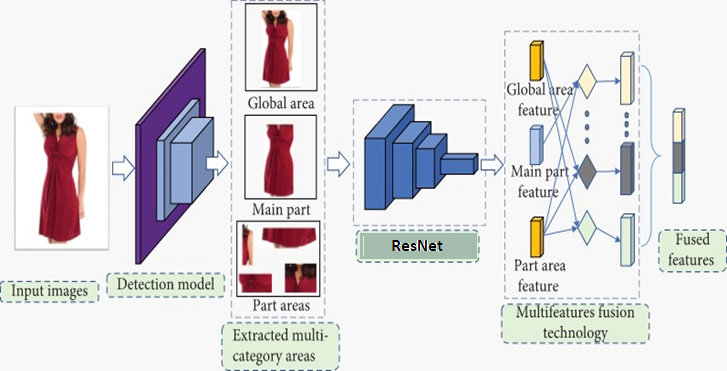

# **Creating a list for image paths**

In [30]:
#img_list = os.path.join("../input/fashion-product-images-small/images/")
image_path = list(paths.list_images("../input/fashion-product-images-small/images/"))

# **Transfer Learning for Feature Extraction**
*We will use ResNet model for Feature Extraction*

In [1]:
ResNet_Url = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

In [ ]:
model = tf.keras.Sequential([
    tfhub.KerasLayer(ResNet_Url, trainable = False)
])

## Getting Fetures from the ResNet Model
*We will store the extracted features into an NumPy Array*


In [ ]:
Features = []
image_array = []
image_name = []
for imgname in image_path:
    img = image.load_img(imgname, target_size  = (224,224))
    img = image.img_to_array(img)
    img2 = np.expand_dims(img, axis = 0)
    Features.append(model.predict(img2))
    image_array.append(img)
    image_name.append(imgname.split('/')[4])
    

del model
del image_path
        

***Converting Feature list into an Array***

In [ ]:
Features_array = np.array(Features)
del Features
Features_array[0]

***Converting Feature Array into an Pandas DataFrame***

In [ ]:
Features_data = Features_array.reshape(44441, 2048)
Features_data = pd.DataFrame(Features_data)
Features_data.head()

***Saving Feature DataFrame into CSV file****

In [ ]:
Features_data.to_csv('Image_Features')

# Applying the KMeans Algorithm on Feature vectors for finding the clusters

In [5]:
data = pd.read_csv("../input/fashion-image-features/Image_Features.csv")
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,4736.3643,0.0,0.0,19.141611,7325.8900,0.0,8717.238,0.0,1713.8334,...,0.0,54.578087,0.0,19.086811,1096.77320,0.0,68.538025,2336.7627,10.198681,1079.37590
1,1,3499.8655,0.0,0.0,59.459763,5473.2040,0.0,8199.333,0.0,940.3688,...,0.0,2.935786,0.0,40.625587,944.03107,0.0,139.992320,2517.0690,53.359955,830.58954
2,2,3754.5205,0.0,0.0,70.283390,5031.0660,0.0,6848.033,0.0,1071.5286,...,0.0,41.999626,0.0,15.460285,927.10077,0.0,243.681300,2496.2393,80.360960,1180.54210
3,3,4990.7370,0.0,0.0,17.773058,7472.6353,0.0,8771.544,0.0,1710.6697,...,0.0,44.038715,0.0,16.073761,1126.36730,0.0,68.472984,2372.2847,10.405752,1115.19640
4,4,4718.2370,0.0,0.0,29.438990,6879.9060,0.0,9290.712,0.0,1214.9702,...,0.0,22.719408,0.0,74.477486,1150.28850,0.0,73.367390,2705.0806,5.919702,795.22110


In [6]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,4736.3643,0.0,0.0,19.141611,7325.8900,0.0,8717.238,0.0,1713.8334,9271.8340,...,0.0,54.578087,0.0,19.086811,1096.77320,0.0,68.538025,2336.7627,10.198681,1079.37590
1,3499.8655,0.0,0.0,59.459763,5473.2040,0.0,8199.333,0.0,940.3688,9082.3690,...,0.0,2.935786,0.0,40.625587,944.03107,0.0,139.992320,2517.0690,53.359955,830.58954
2,3754.5205,0.0,0.0,70.283390,5031.0660,0.0,6848.033,0.0,1071.5286,7188.9424,...,0.0,41.999626,0.0,15.460285,927.10077,0.0,243.681300,2496.2393,80.360960,1180.54210
3,4990.7370,0.0,0.0,17.773058,7472.6353,0.0,8771.544,0.0,1710.6697,9244.5950,...,0.0,44.038715,0.0,16.073761,1126.36730,0.0,68.472984,2372.2847,10.405752,1115.19640
4,4718.2370,0.0,0.0,29.438990,6879.9060,0.0,9290.712,0.0,1214.9702,10300.5820,...,0.0,22.719408,0.0,74.477486,1150.28850,0.0,73.367390,2705.0806,5.919702,795.22110


In [8]:
from sklearn.preprocessing import StandardScaler

SD = StandardScaler().fit(data)
Data_std = SD.transform(data)
print(Data_std[:5])
del data

[[ 0.86790284 -0.09366372  0.         ... -0.87365087 -0.83068638
   0.85849593]
 [-1.19230556 -0.09366372  0.         ... -0.07093565  1.05191601
  -0.4114635 ]
 [-0.76800885 -0.09366372  0.         ... -0.1636685   2.22964205
   1.37491078]
 [ 1.29172919 -0.09366372  0.         ... -0.71550858 -0.82165439
   1.04134592]
 [ 0.83769981 -0.09366372  0.         ...  0.7660832  -1.01732626
  -0.59200589]]


## **We will reduce some Features using the PCA Algorithm**

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
pca = pca.fit(Data_std)
DF_pca = pca.transform(Data_std)

In [23]:
d = pd.DataFrame(data = DF_pca)
d

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-11.826195,-15.651078,2.691062,-2.005863,2.998627,-4.884896,1.890509,2.652012,-0.562703,2.390677,...,-0.277826,0.178768,0.341207,-0.025395,0.175300,0.145152,-0.335383,-0.168252,0.221378,-0.090475
1,12.115212,11.828624,1.796721,-4.666025,5.362717,-1.533658,-0.807252,1.482686,1.211947,1.028268,...,0.276768,-0.065681,0.475373,0.067955,-0.157984,0.015810,-0.048269,0.242734,0.328469,0.186527
2,40.419793,-8.845129,-9.325781,-5.080924,8.143325,5.565790,2.048215,-2.798208,-8.114495,-0.856277,...,0.367615,1.169502,0.745290,-0.754752,0.203427,-0.885363,1.187701,0.589286,-0.214028,0.337980
3,-12.837738,-17.801236,-1.497481,-0.358318,1.766342,-4.945000,3.212787,2.758815,-1.196097,1.583591,...,0.237932,0.085887,-0.123121,-0.445576,-0.423247,0.144260,-0.322319,-0.324581,0.230532,0.256247
4,-13.094689,-5.972908,-10.192365,1.409927,-0.502835,-0.935001,-3.533164,5.313207,2.654820,-0.371979,...,0.064354,-0.071838,0.030939,-0.080115,0.352125,-0.033964,-0.044936,-0.039923,-0.328864,-0.288198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44436,-15.957374,-11.800694,3.578855,-0.661158,0.979298,-4.383431,0.209915,4.495059,-2.643046,0.986476,...,0.252786,-0.157041,0.345427,-0.448757,-0.201111,-0.055076,-0.248428,-0.116075,0.118030,0.181605
44437,22.407831,-24.004361,10.525703,-6.297973,5.939743,5.067140,-4.903595,-13.520476,7.594214,3.212116,...,0.365106,-0.159370,-0.313323,-0.023452,0.061074,-0.728821,0.725497,0.115751,0.650485,0.007985
44438,-6.619821,13.934790,-5.506624,2.192276,-3.457243,0.531958,-3.425388,0.949904,4.537376,0.456686,...,0.141379,-0.254695,-0.002928,-0.079147,-0.053197,0.158887,-0.243639,-0.174442,0.006950,0.088627
44439,6.974556,-5.536271,-21.072432,6.474022,-5.582424,-2.425628,4.465793,1.020111,4.837374,-1.547204,...,-0.624731,0.137605,-1.139914,-0.011649,0.688959,-0.227863,0.211127,-0.103764,-0.138204,0.374471


# **Mini-Batch KMeans Algorithm**

In [13]:
from sklearn.cluster import MiniBatchKMeans

100%|██████████| 29/29 [01:39<00:00,  3.44s/it]


Time for Elbow method in Mini Batch KMeans:  99.8231954574585


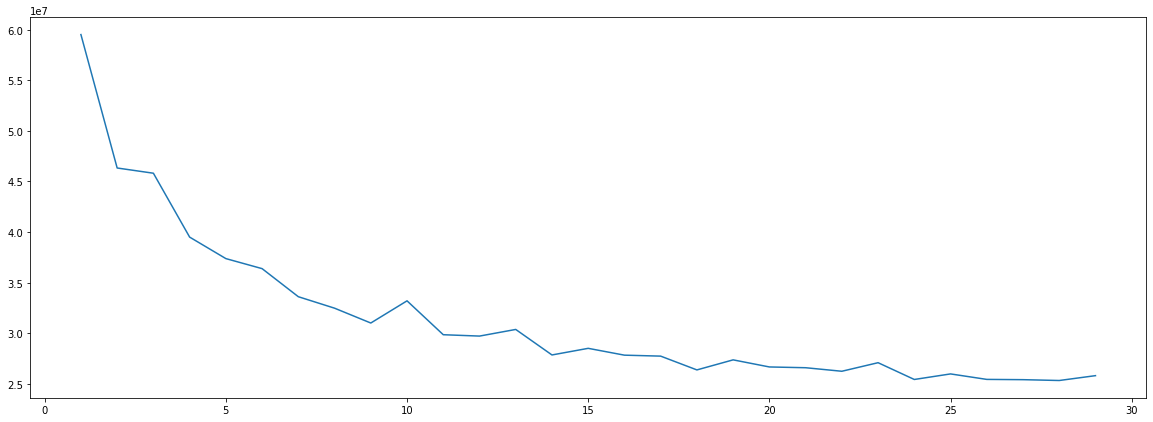

In [106]:
start = time.time()
k = range(1,30)
SSE_MB = []
for i in tqdm(k):
    KMeans_model_MB = MiniBatchKMeans(n_clusters = i, batch_size=1000).fit(d)
    SSE_MB.append(KMeans_model_MB.inertia_)
    
plt.figure(figsize = (20,7))
plt.plot(k, SSE_MB)
end = time.time()
print("Time for Elbow method in Mini Batch KMeans: ", (end - start))

In [135]:
MB_KMeans_model = MiniBatchKMeans(n_clusters = 14,batch_size=1000).fit(d)

In [136]:
MB_KMeans_clusters = MB_KMeans_model.predict(d)
MB_KMeans_clusters

array([ 4, 10, 12, ...,  2,  6,  2], dtype=int32)

In [31]:
image_name = []
for imgname in tqdm(image_path):
    image_name.append(imgname)

100%|██████████| 44441/44441 [00:00<00:00, 1323264.90it/s]


In [137]:
MB_KMeans_cluster_DataFrame = pd.DataFrame()

MB_KMeans_cluster_DataFrame['Image'] = image_name
MB_KMeans_cluster_DataFrame['Cluster'] = MB_KMeans_clusters

MB_KMeans_cluster_DataFrame.head()

,Image,Cluster
0,../input/fashion-product-images-small/images/3...,4
1,../input/fashion-product-images-small/images/3...,10
2,../input/fashion-product-images-small/images/1...,12
3,../input/fashion-product-images-small/images/2...,4
4,../input/fashion-product-images-small/images/3...,8


In [140]:
sub_df = pd.DataFrame()
sub_df = MB_KMeans_cluster_DataFrame[MB_KMeans_cluster_DataFrame['Cluster'] == 10]
sub_df

,Image,Cluster
1,../input/fashion-product-images-small/images/3...,10
26,../input/fashion-product-images-small/images/3...,10
36,../input/fashion-product-images-small/images/2...,10
110,../input/fashion-product-images-small/images/2...,10
118,../input/fashion-product-images-small/images/5...,10
...,...,...
44412,../input/fashion-product-images-small/images/5...,10
44425,../input/fashion-product-images-small/images/8...,10
44426,../input/fashion-product-images-small/images/5...,10
44427,../input/fashion-product-images-small/images/1...,10


Text(0.5, 1.0, 'Fourth')

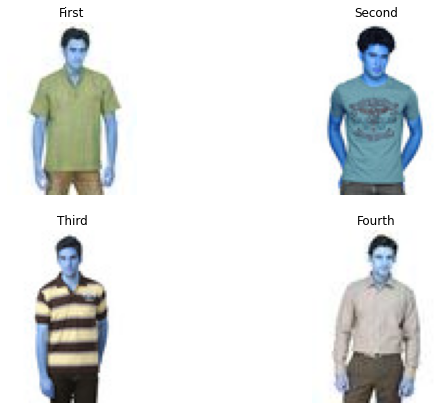

In [141]:
fig = plt.figure(figsize=(10, 7))
img1 = cv2.imread(sub_df['Image'][1])
img2 = cv2.imread(sub_df['Image'][26])
img3 = cv2.imread(sub_df['Image'][36])
img4 = cv2.imread(sub_df['Image'][110])


fig.add_subplot(2, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title("First")

fig.add_subplot(2, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title("Second")

fig.add_subplot(2, 2, 3)
plt.imshow(img3)
plt.axis('off')
plt.title("Third")

fig.add_subplot(2, 2, 4)
plt.imshow(img4)
plt.axis('off')
plt.title("Fourth")


# **KMeans Algorithm**

100%|██████████| 29/29 [07:35<00:00, 15.69s/it]


Time for Elbow method in KMeans:  -2186.9832196235657


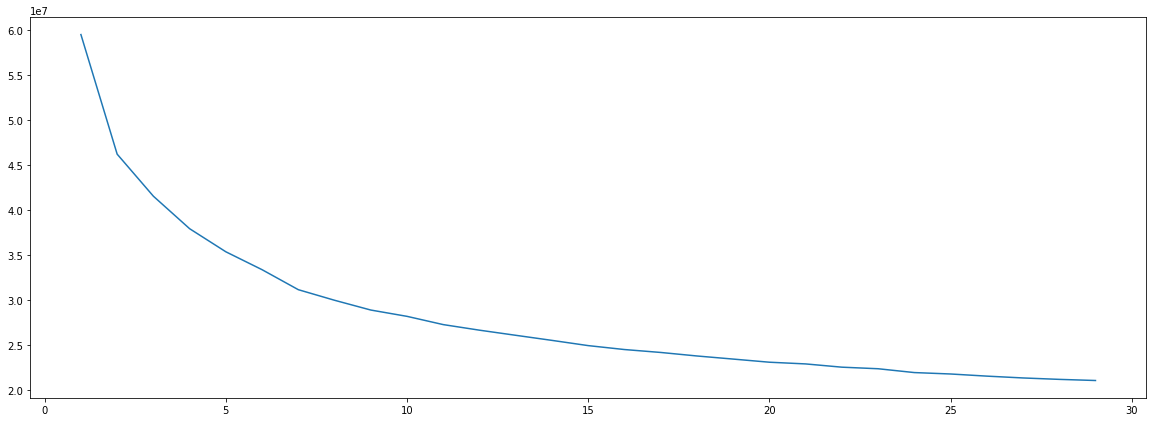

In [142]:
start - time.time()
k = range(1,30)
SSE = []
for i in tqdm(k):
    KMeans_model = KMeans(n_clusters = i).fit(d)
    SSE.append(KMeans_model.inertia_)

plt.figure(figsize = (20,7))
plt.plot(k, SSE)
end = time.time()
print("Time for Elbow method in KMeans: ", (start - end))

In [143]:
model_KMeans = KMeans(n_clusters = 7).fit(d)
clusters = model_KMeans.predict(d)

In [144]:
KMeans_cluster_DataFrame = pd.DataFrame()

KMeans_cluster_DataFrame['Image'] = image_name
KMeans_cluster_DataFrame['Cluster'] = clusters

KMeans_cluster_DataFrame.head()

,Image,Cluster
0,../input/fashion-product-images-small/images/3...,3
1,../input/fashion-product-images-small/images/3...,0
2,../input/fashion-product-images-small/images/1...,5
3,../input/fashion-product-images-small/images/2...,3
4,../input/fashion-product-images-small/images/3...,2


In [146]:
sub_df_1 = pd.DataFrame()
sub_df_1 = KMeans_cluster_DataFrame[KMeans_cluster_DataFrame['Cluster'] == 3]
sub_df_1

,Image,Cluster
0,../input/fashion-product-images-small/images/3...,3
3,../input/fashion-product-images-small/images/2...,3
7,../input/fashion-product-images-small/images/3...,3
16,../input/fashion-product-images-small/images/3...,3
30,../input/fashion-product-images-small/images/5...,3
...,...,...
44411,../input/fashion-product-images-small/images/3...,3
44414,../input/fashion-product-images-small/images/1...,3
44418,../input/fashion-product-images-small/images/3...,3
44433,../input/fashion-product-images-small/images/1...,3


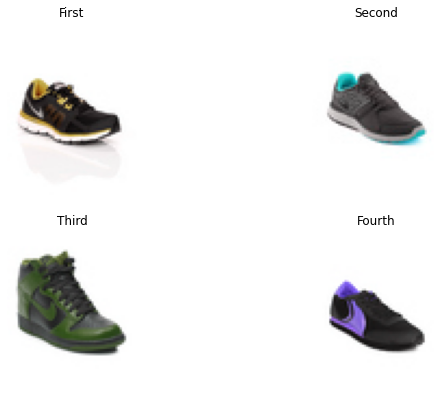

In [147]:
fig = plt.figure(figsize=(10, 7))
img1 = cv2.imread(sub_df_1['Image'][0])
img2 = cv2.imread(sub_df_1['Image'][3])
img3 = cv2.imread(sub_df_1['Image'][7])
img4 = cv2.imread(sub_df_1['Image'][16])


fig.add_subplot(2, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title("First")

fig.add_subplot(2, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title("Second")

fig.add_subplot(2, 2, 3)
plt.imshow(img3)
plt.axis('off')
plt.title("Third")

fig.add_subplot(2, 2, 4)
plt.imshow(img4)
plt.axis('off')
plt.title("Fourth")

del sub_df_1

# Time Required by algorithms

In [1]:
import seaborn as sns

<AxesSubplot:>

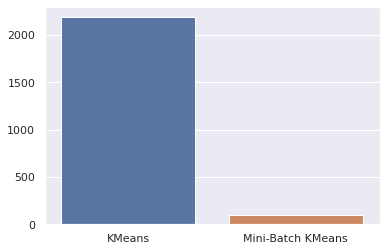

In [5]:
Algorithm = ["KMeans", "Mini-Batch KMeans"]
Time = [2186.98 ,99.82]
sns.set_theme()
sns.barplot(x = Algorithm, y = Time)